In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
companies = pd.read_csv('50_startups.csv')

x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


(0, 4)

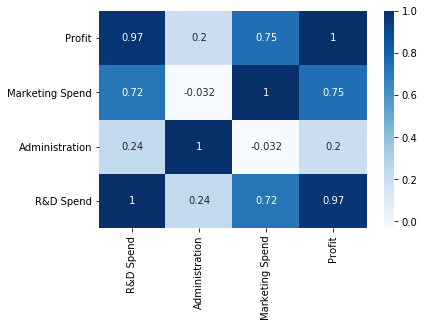

In [3]:
data_heatmap = companies.corr()
hm           = sns.heatmap(data_heatmap, cmap="Blues", annot = True) #annot to show correlation value each column
axes         = hm.axes
axes.set_ylim(0, data_heatmap.shape[0])
axes.set_ylim(0, data_heatmap.shape[1])

In [4]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

labelEncoder = LabelEncoder()
x[:, 3]      = labelEncoder.fit_transform(x[:, 3])

columnTrans = ColumnTransformer(transformers = [("State", OneHotEncoder(), [3])], remainder = "passthrough")
z = columnTrans.fit_transform(x)

oneHotEncoder = OneHotEncoder(categorical_features = [3])
x = oneHotEncoder.fit_transform(x).toarray()

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "catego

In [5]:
#avoiding the dummy variable trap
x = x[:, 1:]

In [6]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
#fitting multiple linear regression to the training test
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#predicting the test set result
y_pred = regressor.predict(x_test)
y_pred

array([103015.20159796, 132582.27760815, 132447.73845175,  71976.09851258,
       178537.48221056, 116161.24230166,  67851.69209676,  98791.73374687,
       113969.43533013, 167921.06569551])

In [9]:
#calculating the coefficients
regressor.coef_

array([-9.59284160e+02,  6.99369053e+02,  7.73467193e-01,  3.28845975e-02,
        3.66100259e-02])

In [10]:
#calculating the intercept
regressor.intercept_

42554.16761772438

In [11]:
#evaluating model
#calculating the R squared value

from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

#r squared value of 0.92 proves the model is a good model

0.9293749209318187